In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
import pandas as pd

dataset = pd.read_csv('/content/newdata.csv')
dataset.head()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56


In [112]:
dataset.isnull().sum()*100/dataset.shape[0]

Area                      0.0
Sensing Range             0.0
Transmission Range        0.0
Number of Sensor nodes    0.0
Number of Barriers        0.0
dtype: float64

There is no null value

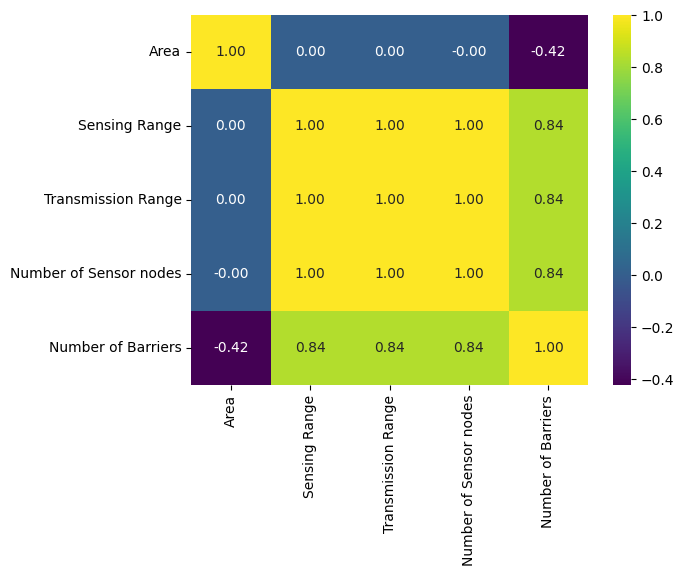

In [169]:
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.show()

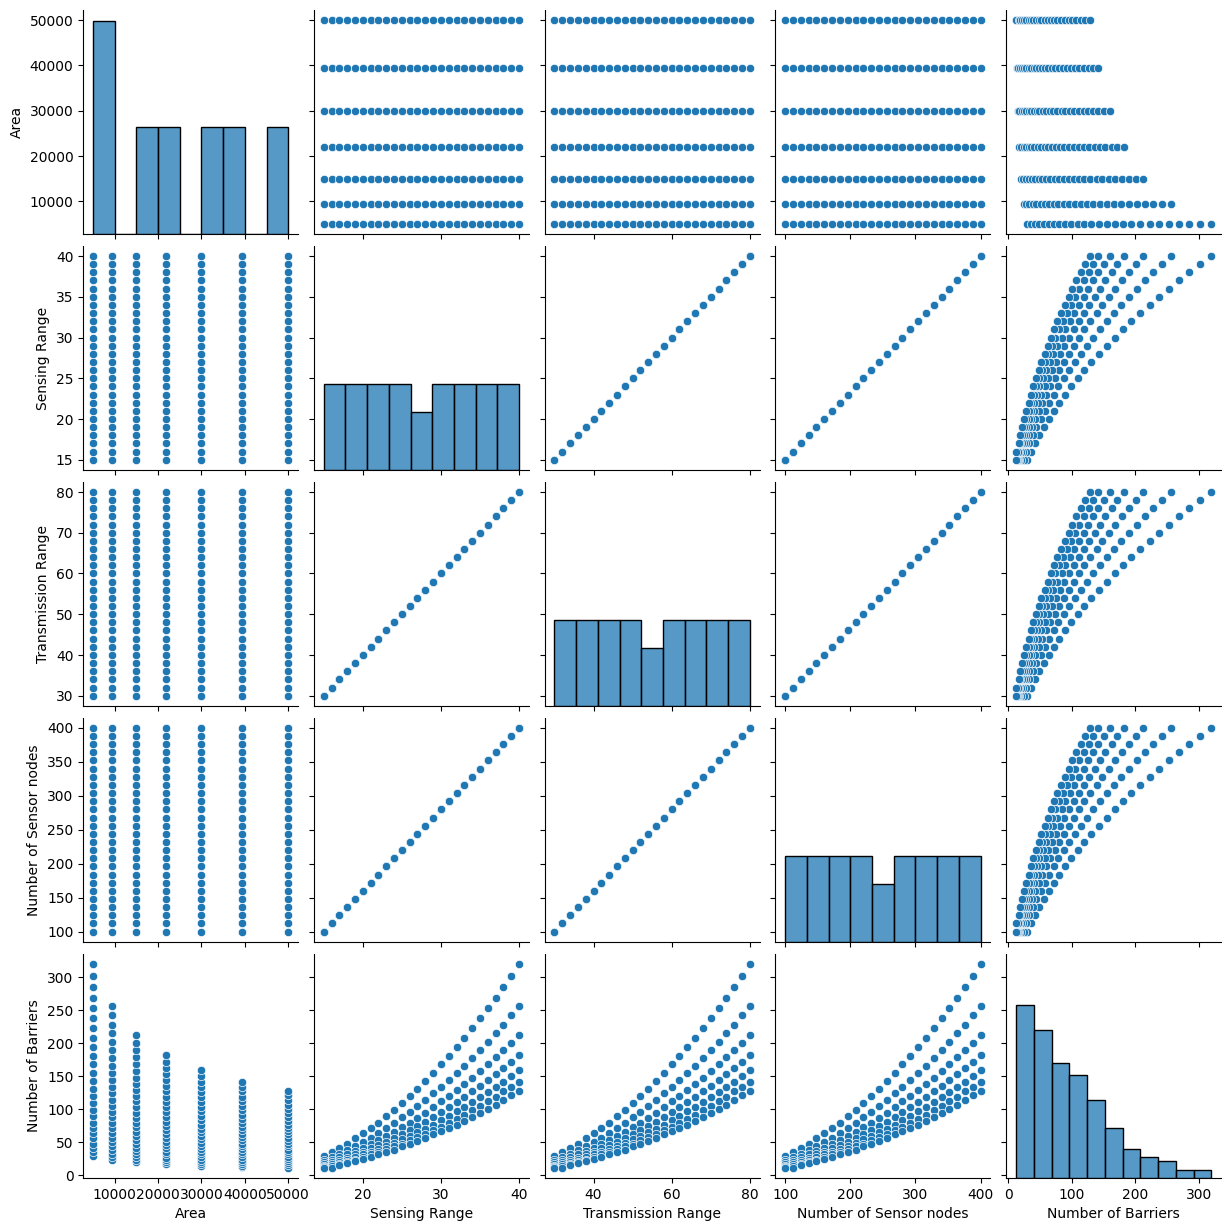

In [172]:
import seaborn as sns

sns.pairplot(dataset)


In [115]:
import matplotlib.pyplot as plt


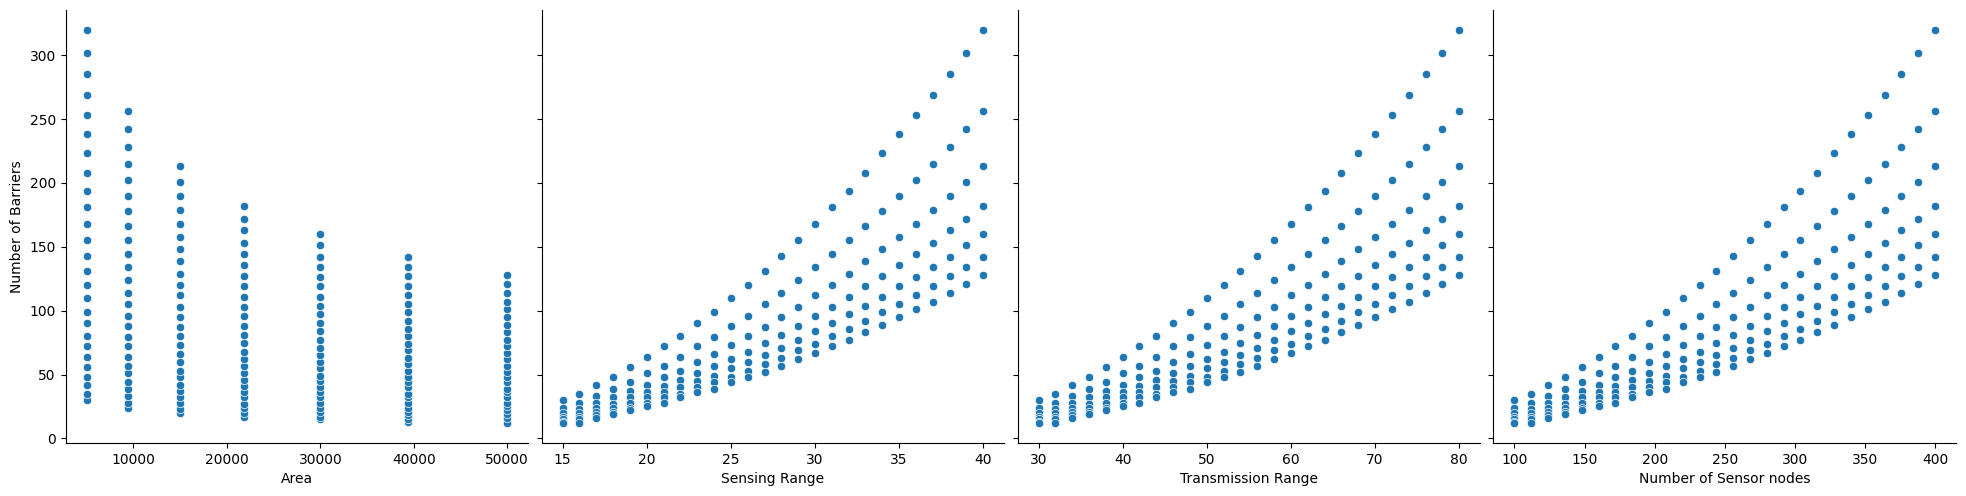

In [117]:
sns.pairplot(dataset, x_vars=['Area', 'Sensing Range',  'Transmission Range', 'Number of Sensor nodes'], y_vars='Number of Barriers', height=5, aspect=1, kind='scatter')
plt.show()

In [118]:
X = dataset[['Area', 'Sensing Range',  'Transmission Range', 'Number of Sensor nodes']]
y = dataset['Number of Barriers']
print(X,y)


      Area  Sensing Range  Transmission Range  Number of Sensor nodes
0     5000             15                  30                     100
1     5000             16                  32                     112
2     5000             17                  34                     124
3     5000             18                  36                     136
4     5000             19                  38                     148
..     ...            ...                 ...                     ...
177  50000             36                  72                     352
178  50000             37                  74                     364
179  50000             38                  76                     376
180  50000             39                  78                     388
181  50000             40                  80                     400

[182 rows x 4 columns] 0       30
1       35
2       42
3       48
4       56
      ... 
177    101
178    107
179    114
180    121
181    128
Name: Number of

In [119]:
X.head()
X.describe()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes
count,182.000000,182.00000,182.000000,182.000000
mean,24375.000000,27.50000,55.000000,250.000000
std,15197.252769,7.52069,15.041379,90.248276
min,5000.000000,15.00000,30.000000,100.000000
25%,9375.000000,21.00000,42.000000,172.000000
50%,21875.000000,27.50000,55.000000,250.000000
75%,39375.000000,34.00000,68.000000,328.000000
max,50000.000000,40.00000,80.000000,400.000000


In [120]:
y.head()
y.describe()

count    182.000000
mean      94.071429
std       65.171006
min       12.000000
25%       42.000000
50%       80.000000
75%      128.750000
max      320.000000
Name: Number of Barriers, dtype: float64

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,train_size = 0.8,test_size = 0.2,random_state = 100)


In [122]:
X_train.shape,y_train.shape

((145, 4), (145,))

In [123]:
X_train.head()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes
40,9375,29,58,268
119,30000,30,60,280
88,21875,25,50,220
69,15000,32,64,304
29,9375,18,36,136


In [124]:
y_train.head()

40     124
119     84
88      62
69     129
29      39
Name: Number of Barriers, dtype: int64

In [125]:
pip install statsmodels

In [126]:
import statsmodels.api as sm

In [128]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
model.params

const                    -0.068301
Area                     -0.001850
Sensing Range            -0.390595
Transmission Range       -0.781191
Number of Sensor nodes    0.776938
dtype: float64

In [129]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Number of Barriers   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     501.1
Date:                Thu, 09 May 2024   Prob (F-statistic):           4.54e-65
Time:                        14:53:31   Log-Likelihood:                -665.84
No. Observations:                 145   AIC:                             1338.
Df Residuals:                     142   BIC:                             1347.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [130]:
y_train_pred = model.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-150-3a4222a59422>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15, color='orange')  # Change color to blue


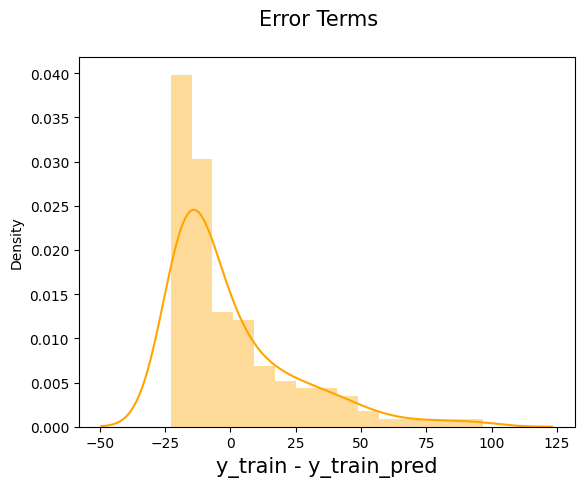

In [150]:
fig = plt.figure()
sns.distplot(res, bins=15, color='orange')  # Change color to blue
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

prediction

In [132]:
X_test_sm = sm.add_constant(X_test)

y_pred = model.predict(X_test_sm)

In [133]:
y_pred.head()


11     120.154602
161     -7.311465
15     149.635730
73     175.358674
46     178.393938
dtype: float64

In [134]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [135]:
np.sqrt(mean_squared_error(y_test, y_pred))

15.045357349644629

In [136]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9182508361725847

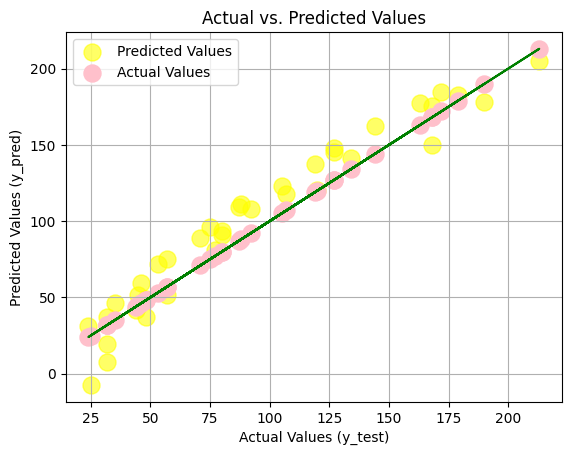

In [162]:
plt.scatter(y_test, y_pred, alpha=0.6, color='yellow', s=150)  # Increase size to 50
plt.scatter(y_test, y_test, color='pink', s=150 )  # Increase size to 50
plt.plot(y_test, y_test, color='green')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')

plt.legend(['Predicted Values', 'Actual Values'])
plt.grid(True)
plt.show()


In [145]:
import pickle

pickle.dump(model, open('/content/model_saved','wb'))

In [146]:
model_loaded = pickle.load(open('/content/model_saved', 'rb'))

In [147]:
model_loaded.predict(X_test_sm)

11     120.154602
161     -7.311465
15     149.635730
73     175.358674
46     178.393938
59      72.174723
173     81.131921
152    137.638253
32      75.209988
169     51.650792
112     51.796881
102    184.751630
77     204.839802
167     36.910228
136     19.713739
150    122.897689
64     109.026134
101    177.381348
7       90.673473
41     141.542527
90      96.308244
74     182.728956
140     49.194867
92     111.048808
97     147.900219
82      37.345986
1       46.451780
148    108.157125
117     88.648292
139     41.824585
146     93.416560
85      59.456833
178    117.983332
26      30.988295
153    145.008536
99     162.640783
163      7.429099
dtype: float64

In [148]:
y_pred = model_loaded.predict(X_test_sm)

result = r2_score(y_test, y_pred)
result


0.9182508361725847